In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import glob
from math import radians, cos, sin, asin, sqrt

In [52]:
# Removed files with 0mb and also 2019. We want to know 2020-10 tm 2020-12 for now.
files = glob.glob(r'GVB 2020/*.csv')
files[0]
gvb_data = pd.concat( (pd.read_csv(file, sep=";") for file in files), ignore_index = True)
gvb_data.head(10)

,Datum,UurgroepOmschrijving (van aankomst),AankomstHalteCode,AankomstHalteNaam,AankomstLat,AankomstLon,AantalReizen
0,10/31/2020 12:00:00 AM,18:00 - 18:59,NaN,Overig,NaN,NaN,1
1,11/30/2020 12:00:00 AM,00:00 - 00:59,NaN,Overig,NaN,NaN,4
2,11/30/2020 12:00:00 AM,01:00 - 01:59,NaN,Overig,NaN,NaN,53
3,11/30/2020 12:00:00 AM,02:00 - 02:59,NaN,Overig,NaN,NaN,49
4,11/30/2020 12:00:00 AM,03:00 - 03:59,NaN,Overig,NaN,NaN,30
5,11/30/2020 12:00:00 AM,04:00 - 04:59,NaN,Overig,NaN,NaN,65
6,11/30/2020 12:00:00 AM,05:00 - 05:59,NaN,Overig,NaN,NaN,302
7,11/30/2020 12:00:00 AM,05:00 - 05:59,[[ Onb,[[ Onbekend ]],0.000000,0.000000,24
8,11/30/2020 12:00:00 AM,05:00 - 05:59,00561,Station Bijlmer ArenA,4.947419,52.311329,14
9,11/30/2020 12:00:00 AM,05:00 - 05:59,00562,Station Bijlmer ArenA,4.947360,52.311383,18


In [6]:
gvb_data['Datum'] = pd.to_datetime(gvb_data['Datum'])

In [7]:
# Only select data from 10-2020 till 12-2020, drop if destination is unknown. Remove NaN and [[ Onbekend ]] values
gvb_data = gvb_data.sort_values(by=['Datum', 'UurgroepOmschrijving (van aankomst)'])
gvb_data_2020Q4 = gvb_data[(gvb_data['Datum'] > '2020-10-1') & (gvb_data['Datum'] <= '2020-12-31')]
gvb_data_2020Q4_cleaned = gvb_data_2020Q4[gvb_data_2020Q4['AankomstHalteCode'].notnull()]
gvb_data_2020Q4_cleaned = gvb_data_2020Q4_cleaned[gvb_data_2020Q4_cleaned['AankomstHalteNaam'] != "[[ Onbekend ]]"]

gvb_data_2020Q4_cleaned.head()

,Datum,UurgroepOmschrijving (van aankomst),AankomstHalteCode,AankomstHalteNaam,AankomstLat,AankomstLon,AantalReizen
250401,2020-10-02,00:00 - 00:59,00441,Muiderpoortstation,4.932541,52.360885,11
250402,2020-10-02,00:00 - 00:59,04012,Baden Powellweg,4.791374,52.356466,11
250403,2020-10-02,00:00 - 00:59,04050,Meer en Vaart,4.809944,52.356369,14
250404,2020-10-02,00:00 - 00:59,04196,Station Lelylaan,4.833823,52.357904,10
250405,2020-10-02,00:00 - 00:59,05011,Centraal Station,4.899218,52.378108,24


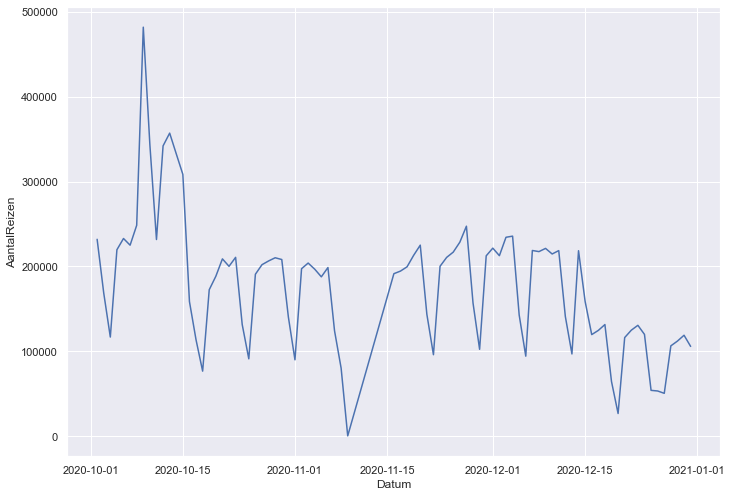

In [8]:
gvb_data_2020Q4_cleaned_travellers_per_day = gvb_data_2020Q4_cleaned.groupby(['Datum']).sum().reset_index()
gvb_data_2020Q4_cleaned_travellers_per_day.head()

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="Datum", y="AantalReizen", data=gvb_data_2020Q4_cleaned_travellers_per_day);

In [9]:
# Strange, there seems to be missing data 2020-11-08, let's check this. 395 is very very low, so let's replace
# this outlier with one week before
gvb_data_2020Q4_cleaned_travellers_per_day.set_index('Datum')["2020-11"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,AankomstLat,AankomstLon,AantalReizen
Datum,,,
2020-11-01,12702.356859,136028.470307,89996
2020-11-02,24511.491338,262426.020935,197347
2020-11-03,25084.545785,268550.383348,203996
2020-11-04,24236.090222,259493.620806,196745
2020-11-05,23355.420156,250067.793310,187776
2020-11-06,24050.847712,257500.428780,198735
2020-11-07,16397.032755,175557.136745,124235
2020-11-08,11192.944968,119901.210636,80213
2020-11-09,113.048821,1204.008159,395


In [10]:
# Replace 9 november values by values of one week before, 2 november
gvb_data_2020Q4_cleaned_without_9_november = gvb_data_2020Q4_cleaned[gvb_data_2020Q4_cleaned['Datum'] != "2020-11-09"]
gvb_data_2020Q4_cleaned_2_november = gvb_data_2020Q4_cleaned[gvb_data_2020Q4_cleaned["Datum"] == "2020-11-2"]
gvb_data_2020Q4_cleaned_2_november['Datum'] = pd.to_datetime(gvb_data_2020Q4_cleaned_2_november['Datum']) + pd.DateOffset(days=7)
frames = [gvb_data_2020Q4_cleaned_2_november, gvb_data_2020Q4_cleaned_without_9_november]
gvb_data_2020Q4_very_cleaned = pd.concat(frames)
gvb_data_2020Q4_very_cleaned.sort_values(by='Datum', inplace=True)

gvb_data_2020Q4_very_cleaned

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Datum,UurgroepOmschrijving (van aankomst),AankomstHalteCode,AankomstHalteNaam,AankomstLat,AankomstLon,AantalReizen
254396,2020-10-02,17:00 - 17:59,07507,Seine,4.866381,52.284126,13
252394,2020-10-02,13:00 - 13:59,00039,Hogeweg,4.930840,52.353581,18
252395,2020-10-02,13:00 - 13:59,00040,Hogeweg,4.931358,52.353214,12
252396,2020-10-02,13:00 - 13:59,00070,Kruislaan,4.939939,52.347899,10
252397,2020-10-02,13:00 - 13:59,00074,Brinkstraat,4.947973,52.342851,20
...,...,...,...,...,...,...,...
3014327,2020-12-31,13:00 - 13:59,00151,Tulastraat,4.965845,52.319854,17
3014328,2020-12-31,13:00 - 13:59,00152,Florijn,4.958592,52.317590,13
3014329,2020-12-31,13:00 - 13:59,00197,Annie Romeinplein,4.971620,52.321735,41
3014331,2020-12-31,13:00 - 13:59,00238,Anton de Komplein,4.954134,52.316037,61


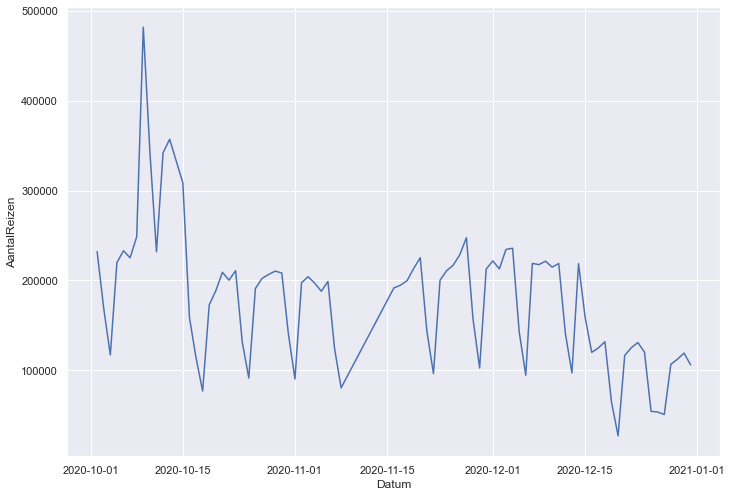

In [11]:
# travels per day in 2020-10 - 2020-12 period
gvb_data_2020Q4_very_cleaned_travellers_per_day = gvb_data_2020Q4_cleaned_without_9_november.groupby(['Datum']).sum().reset_index()
gvb_data_2020Q4_very_cleaned_travellers_per_day.head()

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="Datum", y="AantalReizen", data=gvb_data_2020Q4_very_cleaned_travellers_per_day);

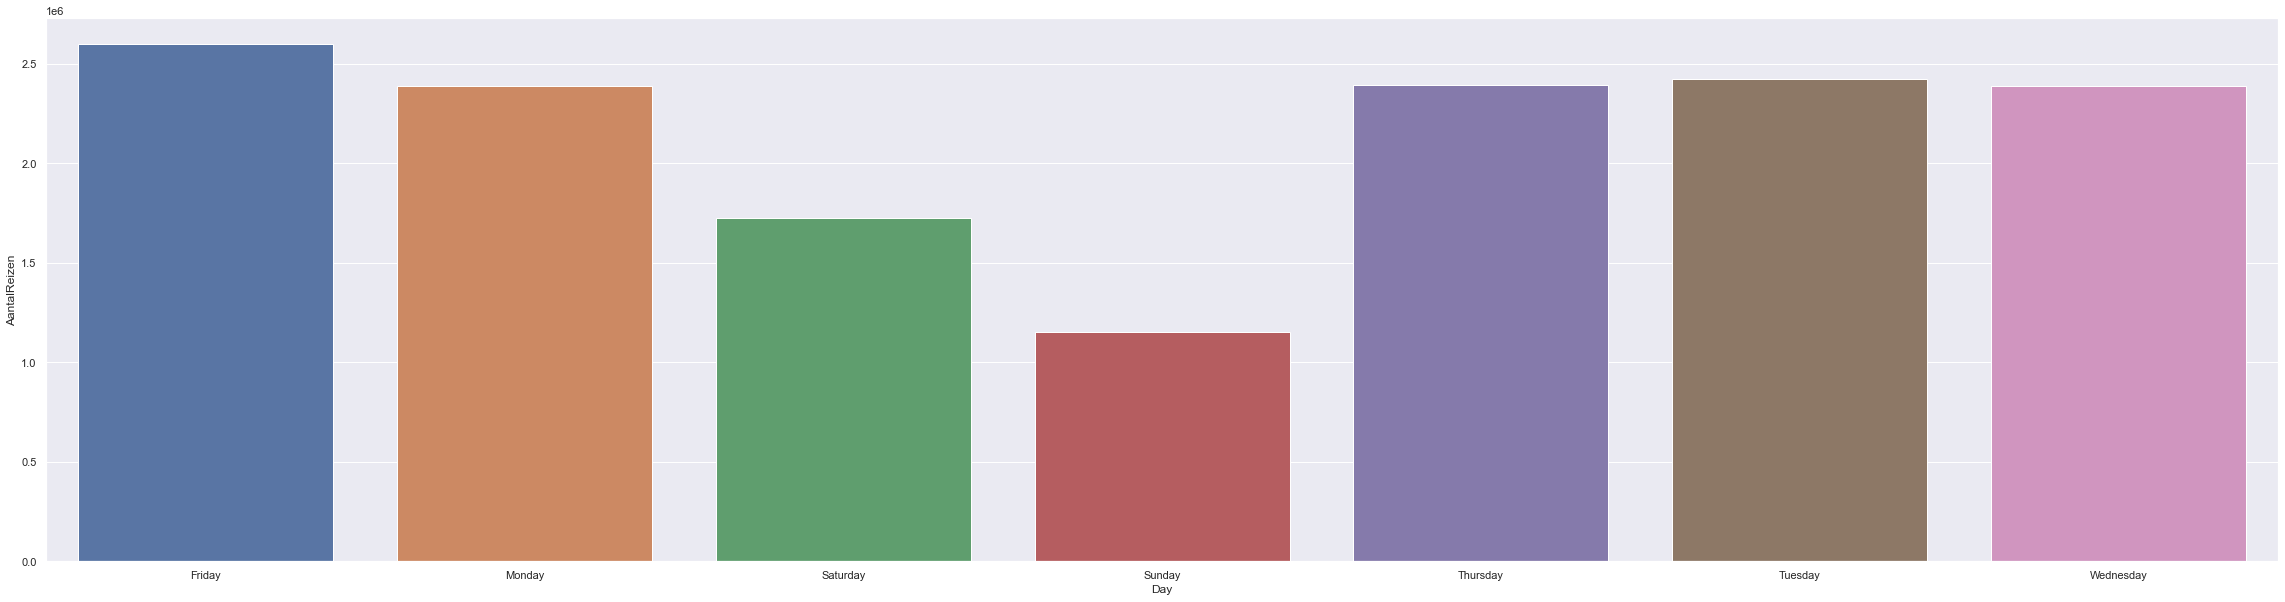

In [12]:
# Travels per day --> Sundays less public transport
gvb_data_2020Q4_very_cleaned_travellers_per_day['Day'] = gvb_data_2020Q4_very_cleaned_travellers_per_day[['Datum']].apply(lambda x: dt.datetime.strftime(x['Datum'], '%A'), axis=1)
g2020Q4_summed_per_day = gvb_data_2020Q4_very_cleaned_travellers_per_day.groupby('Day').sum().reset_index()

plt.figure(figsize=(40,10))
sns.barplot(x="Day", y="AantalReizen", data=g2020Q4_summed_per_day);

# Calculate stations near park

In [13]:
# Create DF with all stations with their lon and lat
stations_lon_lat = gvb_data_2020Q4_very_cleaned.drop_duplicates(subset=['AankomstHalteNaam'])[['AankomstHalteNaam', 'AankomstLat', 'AankomstLon']]
stations_lon_lat = stations_lon_lat.set_index('AankomstHalteNaam')
stations_lon_lat.rename(columns={"AankomstLat": "lat", "AankomstLon": "lng"}, inplace=True)
stations_lon_lat

,lat,lng
AankomstHalteNaam,,
Seine,4.866381,52.284126
Hogeweg,4.930840,52.353581
Kruislaan,4.939939,52.347899
Brinkstraat,4.947973,52.342851
Dennenrode,4.952138,52.322096
...,...,...
Sportlaan,4.863368,52.289874
Ouderkerkerlaan,4.867212,52.295823
Westpoortweg,4.794296,52.397034


In [45]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

def add_nearby_stations(radius, center_point_dict, add_to_list):
    """
    radius in km
    center_point_dict needs to be a dictionary with the lon and lat from a location
    add_to_list specify to which list this needs to be added (for example vondelpark)
    """
    latpark = center_point_dict[0]['lat']
    lonpark = center_point_dict[0]['lng']

    # check for every station if it is within 1 km distance of the park
    for station in range(len(stations_lon_lat)):
        name_station = stations_lon_lat.iloc[station].name
        latstation = stations_lon_lat.iloc[station].lat
        lonstation = stations_lon_lat.iloc[station].lng

        a = haversine(lonpark, latpark, lonstation, latstation)
        
        if a <= radius:
            add_to_list.append(name_station)

In [46]:
# Center points of all the parks (https://www.latlong.net/)
all_parks = ['vondelpark', 'oosterpark', 'sarphatipark',
               'westerpark', 'rembrandpark', 'erasmuspark']

vondelpark = [{'lat': 4.868648, 'lng': 52.357645}]
oosterpark = [{'lat': 4.920558, 'lng': 52.360098}]
sarphatipark = [{'lat': 4.896375, 'lng': 52.354364}]
westerpark = [{'lat': 4.873437, 'lng': 52.386986}]
rembrandpark = [{'lat': 4.846757, 'lng': 52.364145}]
erasmuspark = [{'lat': 4.851909, 'lng': 52.374808}]

# Create empty list that needs to be filled later
vondelpark_stations = []
oosterpark_stations = []
sarphatipark_stations = []
westerpark_stations = []
rembrandpark_stations = []
erasmuspark_stations = []

# calculate all station within 1 km from the park
add_nearby_stations(1,vondelpark,vondelpark_stations)
add_nearby_stations(1,oosterpark,oosterpark_stations)
add_nearby_stations(1,sarphatipark,sarphatipark_stations)
add_nearby_stations(1,westerpark,westerpark_stations)
add_nearby_stations(1,rembrandpark,rembrandpark_stations)
add_nearby_stations(1,erasmuspark,erasmuspark_stations)

In [50]:
# Example, stations near westerpark
westerpark_stations

['Fred. Hendrikplants.',
 'Nassaukade',
 'Spaarndammerstraat',
 'Assendelftstraat',
 'V.d. Hoopstraat',
 'Van Hallstraat',
 'De Wittenkade',
 'Kostverlorenstraat',
 'Van L.Stirumstraat',
 'Van Beuningenplein',
 'Haparandaweg',
 'Zaanstraat',
 'Nassauplein',
 'Archangelkade']

In [ ]:
all_stations